# Classification

In [123]:
import pandas as pd
import numpy as np

In [125]:
dataset = pd.read_csv("../../datasets/random-forest/bill_authentication.csv")

In [126]:
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [127]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [129]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [130]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [131]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[155   2]
 [  1 117]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9890909090909091


In [132]:
y_pred_train = classifier.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       605
           1       1.00      1.00      1.00       492

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



# Regression

In [1]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('../../datasets/random-forest/petrol_consumption.csv')

In [4]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values 

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [12]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 51.76500000000001
Mean Squared Error: 4216.166749999999
Root Mean Squared Error: 64.93201637097064


In [110]:
rf = RandomForestRegressor(n_estimators=5, random_state=0) #max_depth = 4
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5, random_state=0)

DecisionTreeRegressor(max_features=1.0, random_state=209652396)


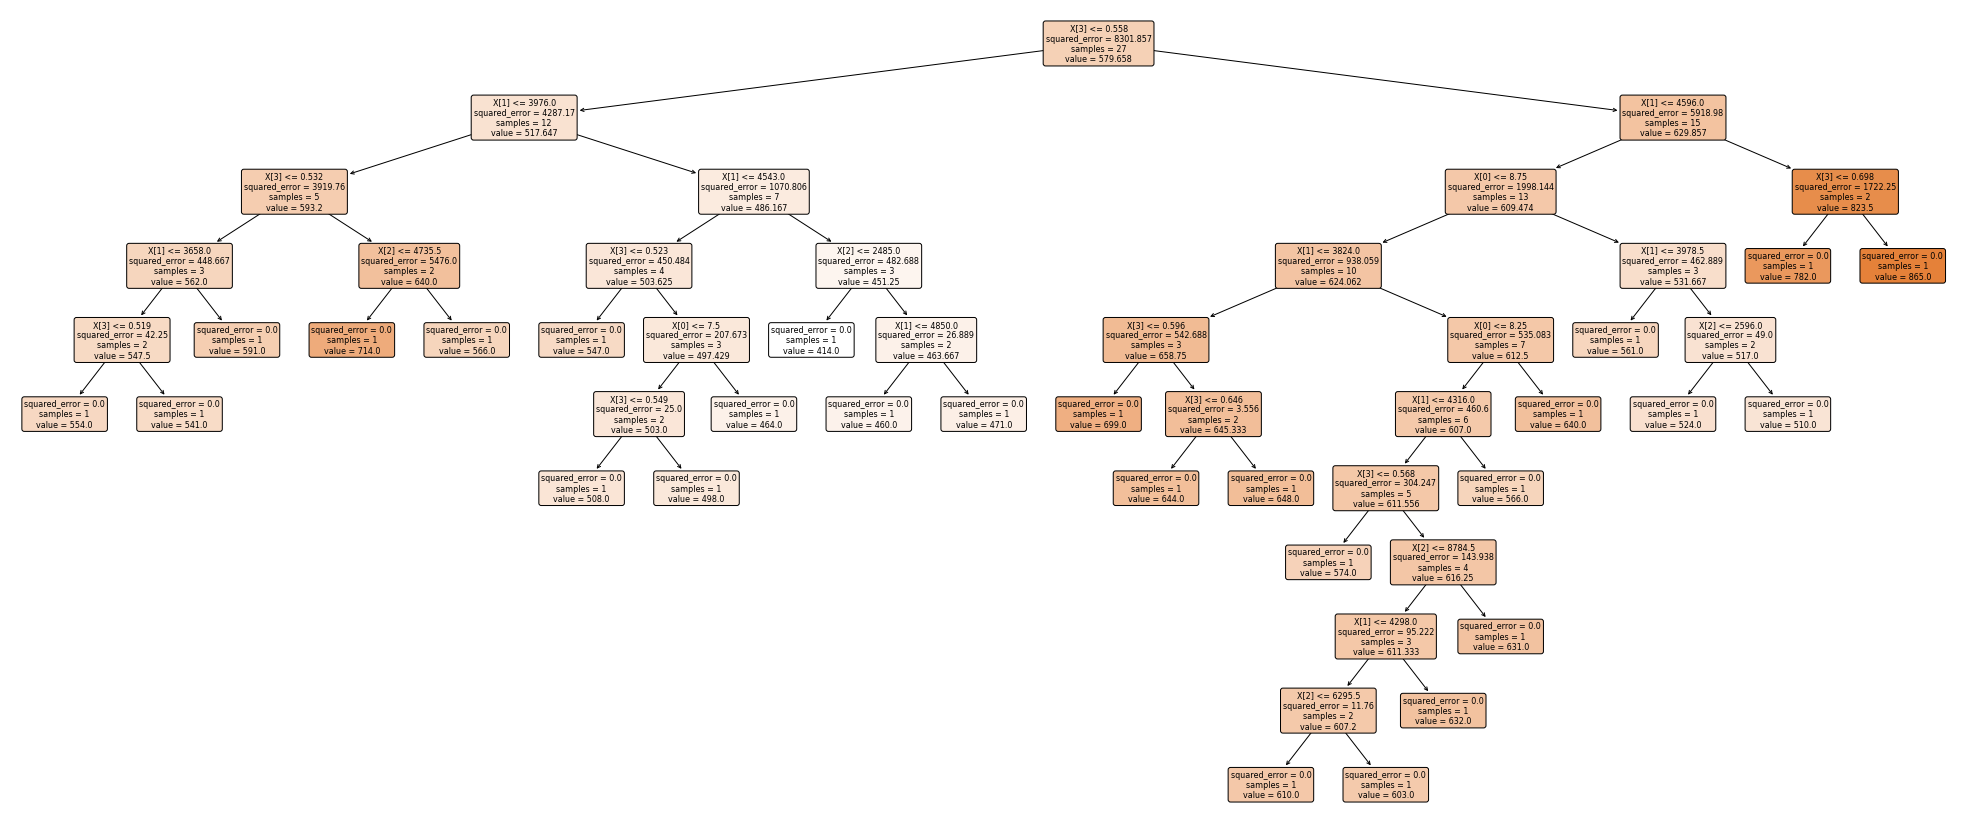

DecisionTreeRegressor(max_features=1.0, random_state=398764591)


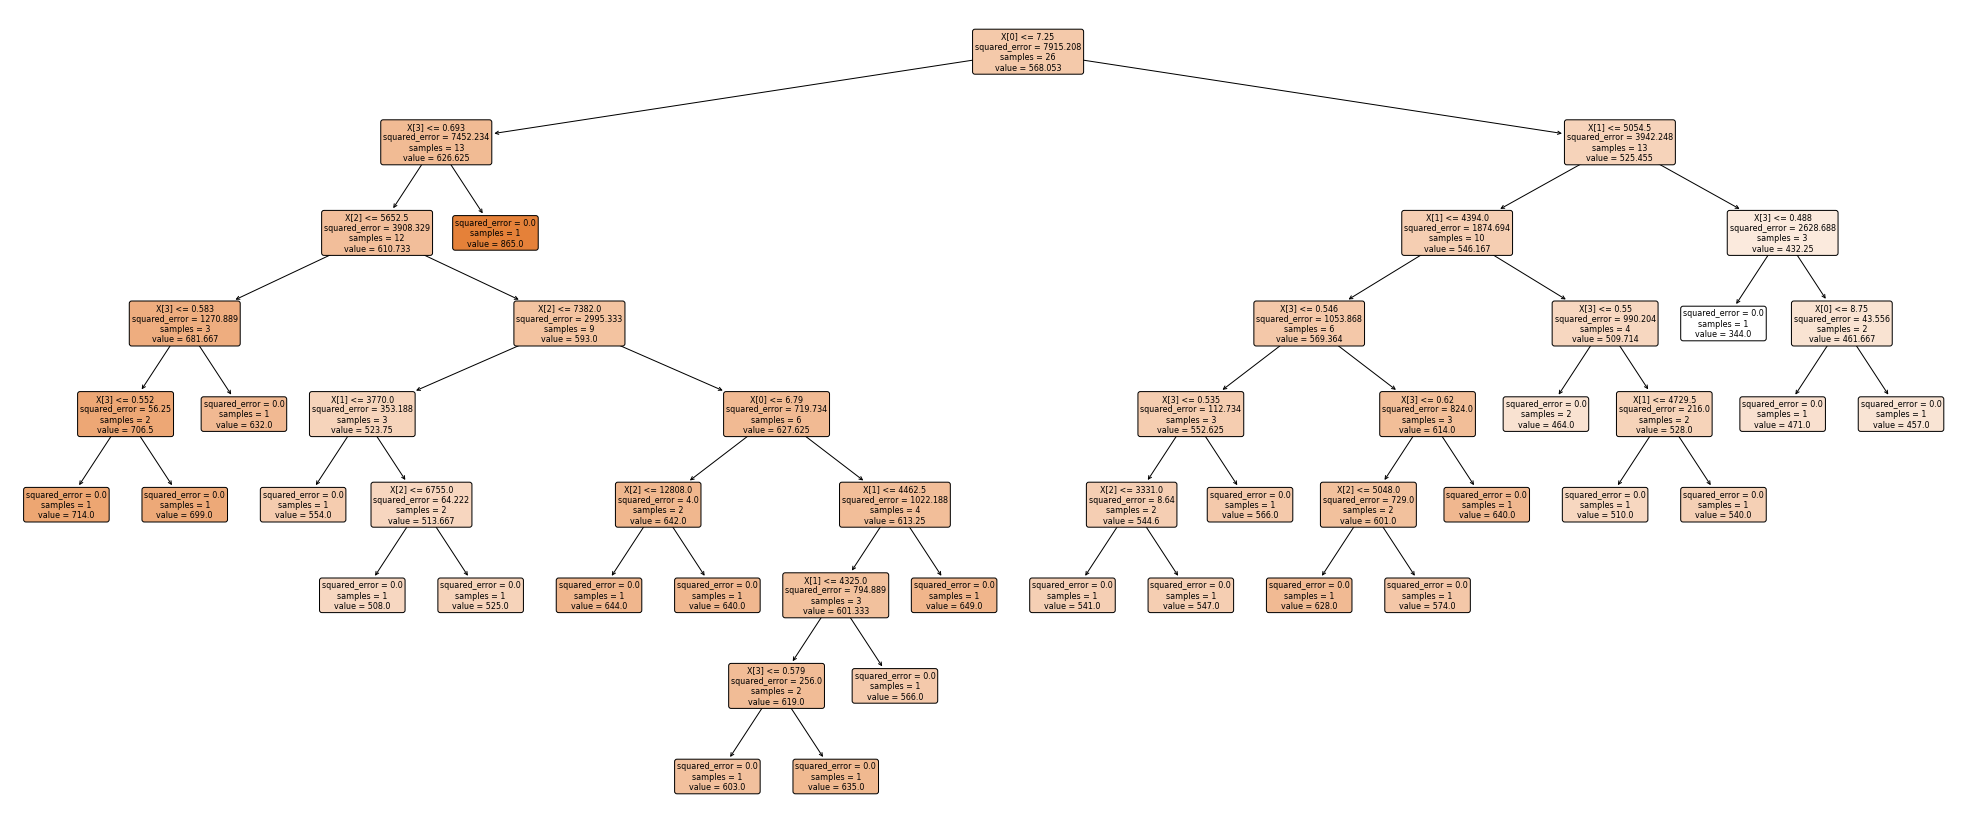

DecisionTreeRegressor(max_features=1.0, random_state=924231285)


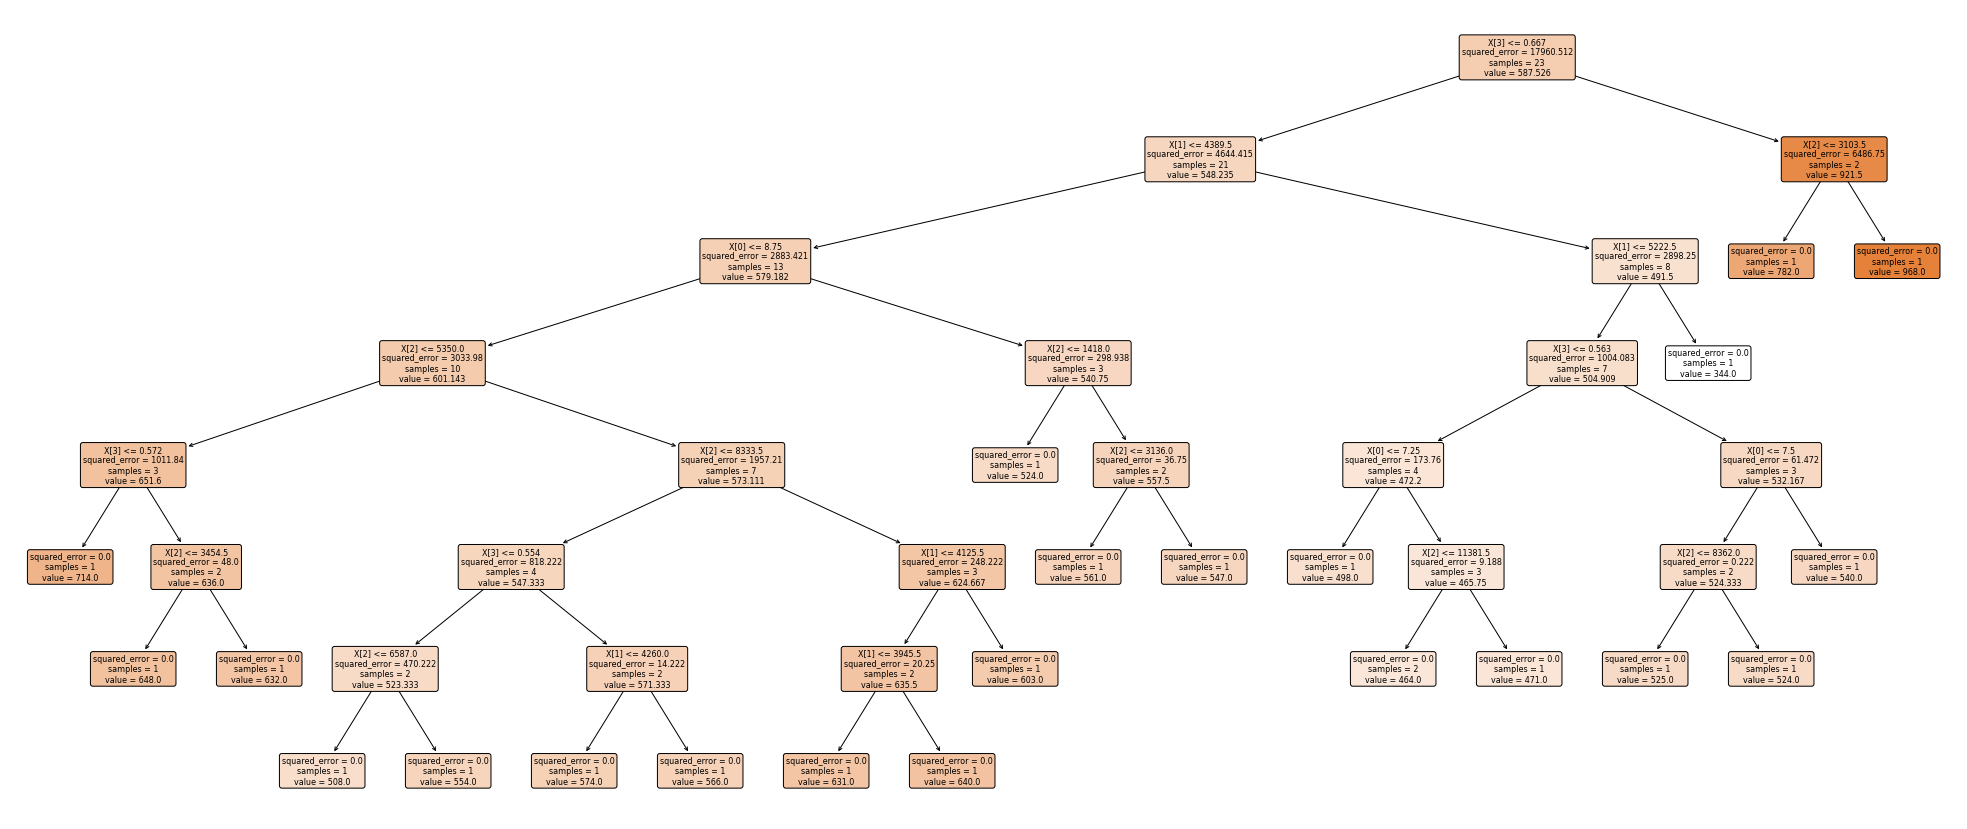

DecisionTreeRegressor(max_features=1.0, random_state=1478610112)


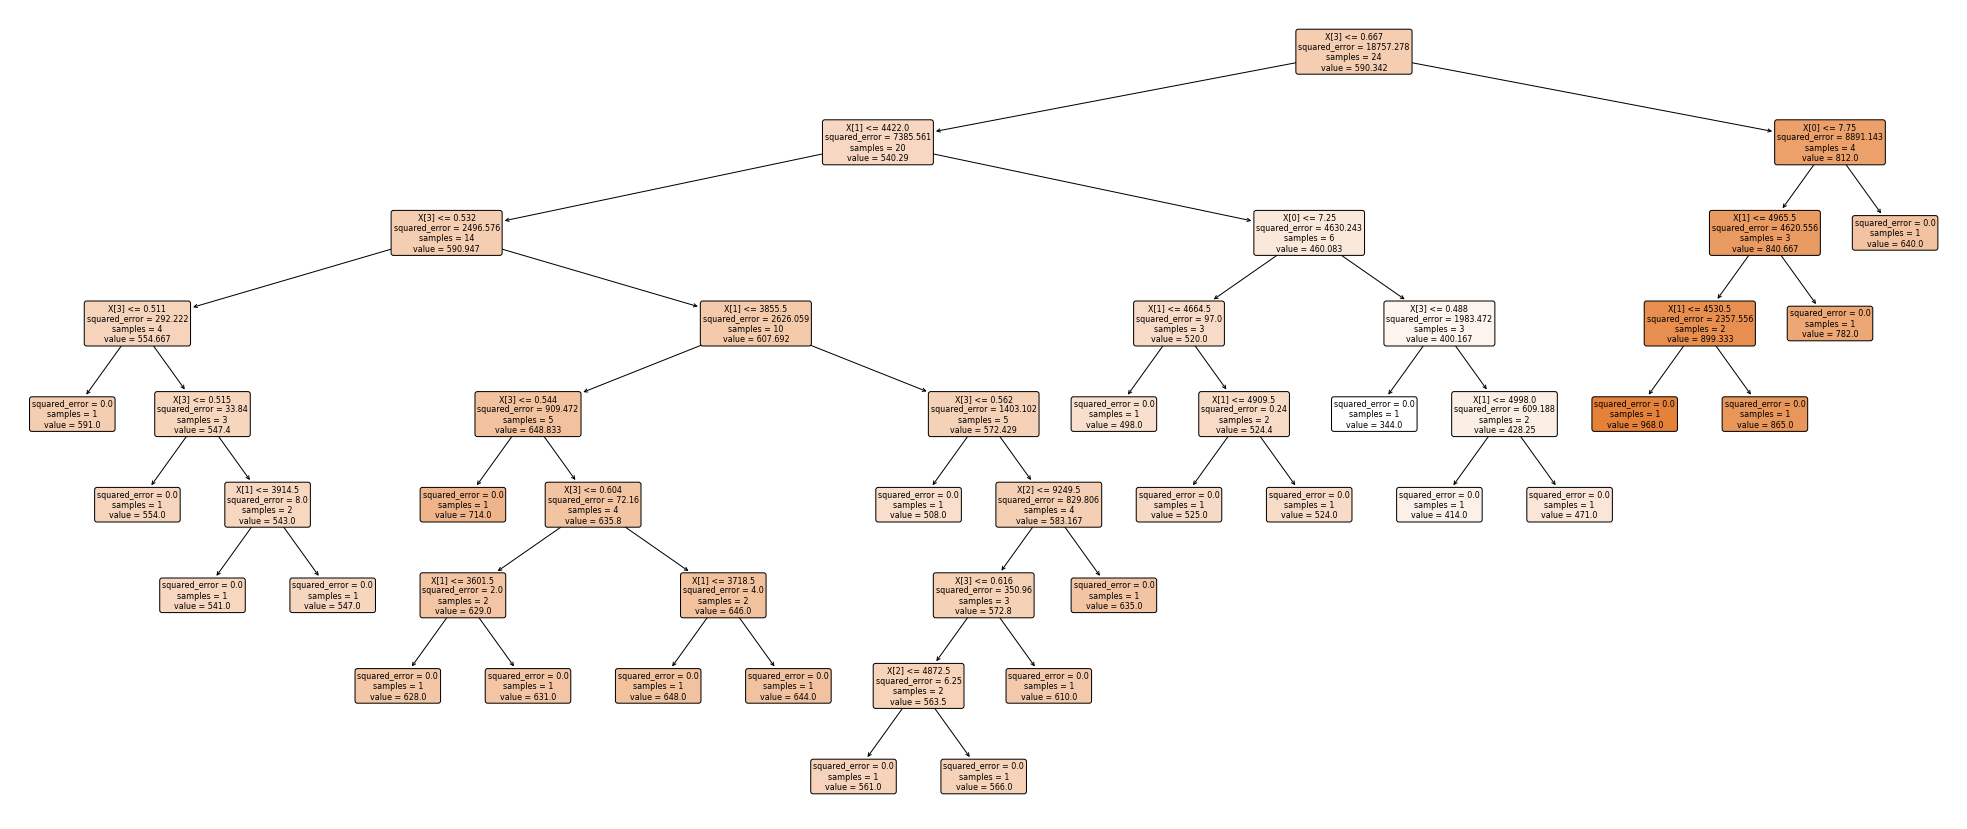

DecisionTreeRegressor(max_features=1.0, random_state=441365315)


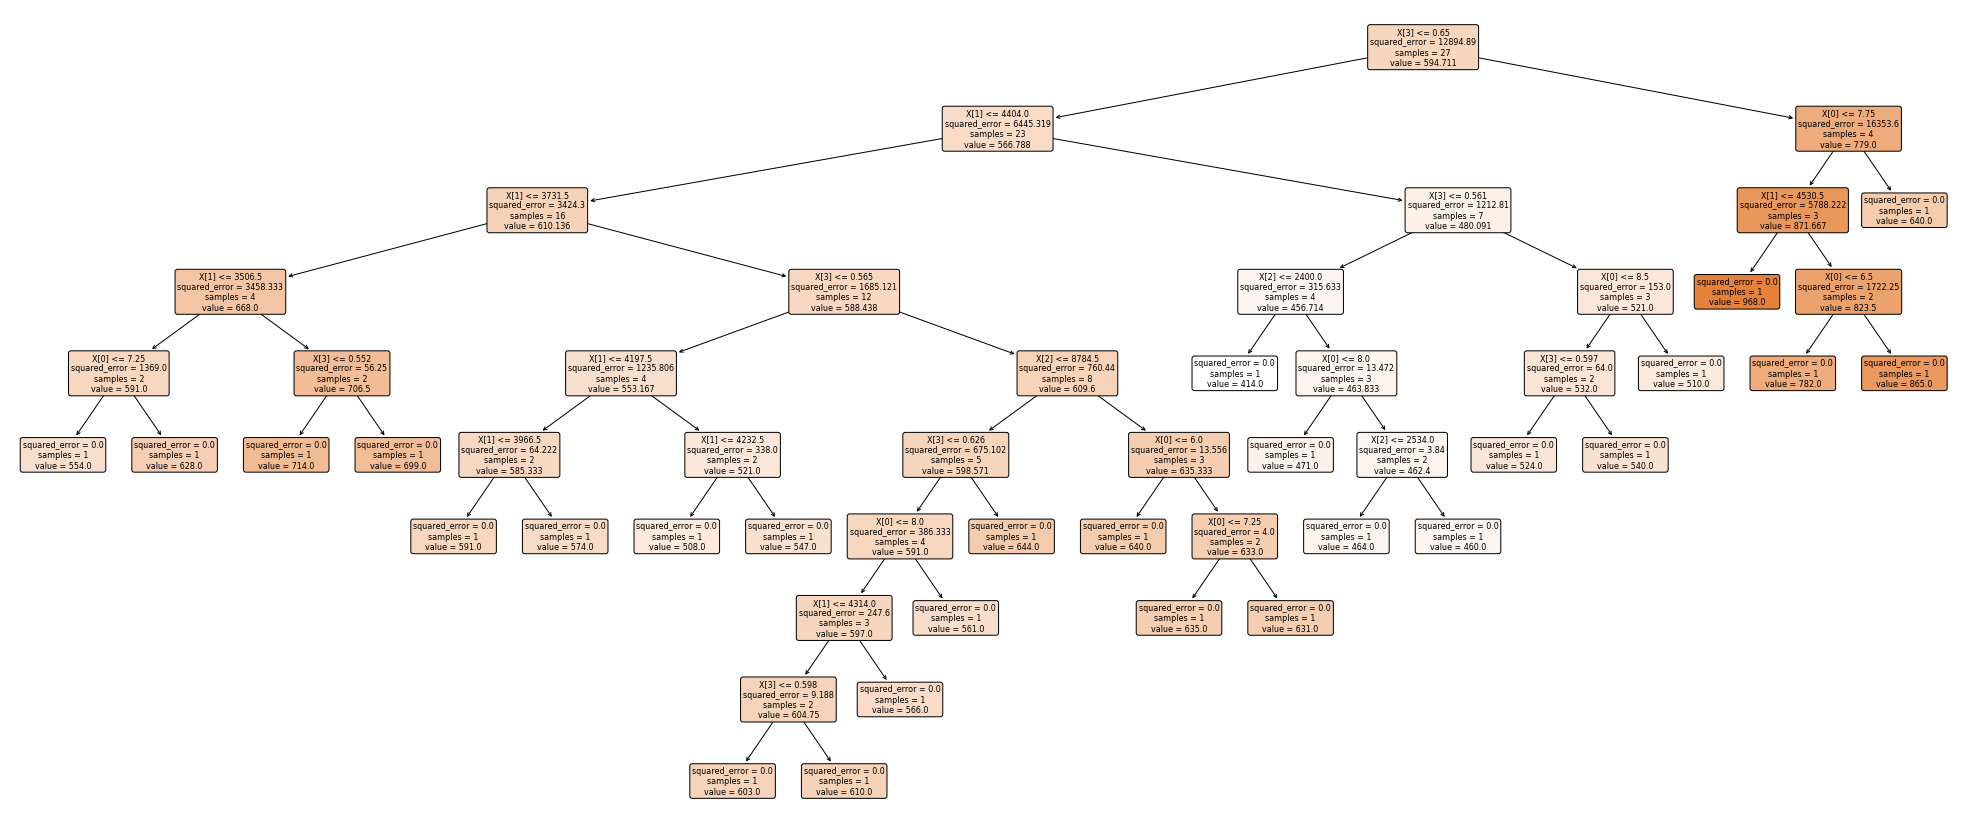

In [122]:
from sklearn import tree

for estimator in rf.estimators_:
    print(estimator)
    plt.figure(figsize=(35,15))
    tree.plot_tree(estimator, 
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

In [82]:
numbers = [5, 10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450]
def print_metrics_for_different_number_of_trees(numbers):
    rmses = []
    trees = []
    mses = []
    maes = []
    for number in numbers: 
        regressor = RandomForestRegressor(n_estimators=number, random_state=0)
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        trees.append(number)
        rmses.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        maes.append(metrics.mean_absolute_error(y_test, y_pred))
        mses.append(metrics.mean_squared_error(y_test, y_pred))
        print(number)
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        print('-'*10)
    return rmses, trees, mses, maes

In [71]:
rmses, trees, mses, maes = print_metrics_for_different_number_of_trees(numbers)

5
Mean Absolute Error: 58.720000000000006
Mean Squared Error: 5408.984000000001
Root Mean Squared Error: 73.54579525710496
----------
10
Mean Absolute Error: 49.059999999999995
Mean Squared Error: 4300.907999999999
Root Mean Squared Error: 65.58130831265872
----------
20
Mean Absolute Error: 51.76500000000001
Mean Squared Error: 4216.166749999999
Root Mean Squared Error: 64.93201637097064
----------
50
Mean Absolute Error: 49.45600000000002
Mean Squared Error: 3773.84936
Root Mean Squared Error: 61.431664148059674
----------
100
Mean Absolute Error: 48.12099999999999
Mean Squared Error: 3624.9929300000003
Root Mean Squared Error: 60.207914180778594
----------
150
Mean Absolute Error: 47.962
Mean Squared Error: 3546.0343955555554
Root Mean Squared Error: 59.54858852697984
----------
200
Mean Absolute Error: 48.124500000000005
Mean Squared Error: 3497.802072500001
Root Mean Squared Error: 59.142219035981405
----------
250
Mean Absolute Error: 47.988800000000005
Mean Squared Error: 3483.7

In [80]:
np.array(mses)/100

array([54.08984   , 43.00908   , 42.1616675 , 37.7384936 , 36.2499293 ,
       35.46034396, 34.97802073, 34.8376239 , 34.72222598, 34.49574215,
       34.8140101 , 34.72456558])

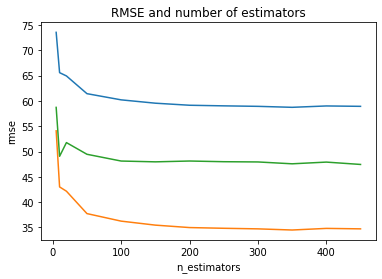

In [81]:
import matplotlib.pyplot as plt
plt.plot(trees, rmses)
plt.plot(trees, np.array(mses)/100)
plt.plot(trees, maes)
plt.title('RMSE and number of estimators')
plt.xlabel("n_estimators")
plt.ylabel("rmse");